#### Question 3 (3 points)

a. Use the synthetic dataset (created below) to train a logistic regression model on the training set. Calculate the AUC of your prediction on the test set.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.make_classification(n_samples=2000, n_features=20,
                                    n_informative=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
# Your code goes here
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
y_pred_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
metrics.auc(fpr, tpr)

0.7089895496025905

b. Randomly sample 100, 300, and 1000 data points from the training set. For each sample size, randomly sample 1000 times, each time fit a logistic regresson, predict on the test set and calcuate the AUC. Plot a distribution of the 1000 AUCs for each sample size on the same plot. Also, plot the AUC you get from 3a as a verticle line on the same plot as well. (Hints: Plot [distributions/histogram](https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib).) 

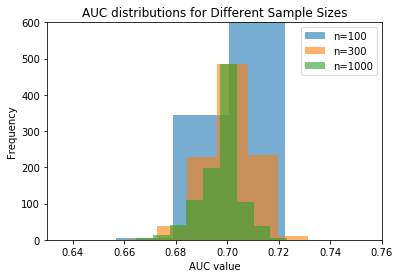

In [45]:
# Your code goes here
import numpy as np
import random
import matplotlib.pyplot as plt

def makeAUCList(sample_size):
    auc_list = []
    for n in range(1000):
        indices = np.random.choice(np.arange(len(X_train)), sample_size)
        X_train_sample = []
        y_train_sample = []
        for i in indices:
            X_train_sample.append(X_train[i])
            y_train_sample.append(y_train[i])
        clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train_sample, y_train_sample)
        y_pred_prob = clf.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
        auc_list.append(metrics.auc(fpr, tpr))
    return auc_list

auc_list_100 = makeAUCList(100)
auc_list_300 = makeAUCList(300)
auc_list_1000 = makeAUCList(1000)

counts_100, bins_100 = np.histogram(auc_list_100)
counts_300, bins_300 = np.histogram(auc_list_300)
counts_1000, bins_1000 = np.histogram(auc_list_1000)

plt.hist(bins[:-1], bins_100, weights=counts_100, alpha=0.6, label='n=100')
plt.hist(bins[:-1], bins_300, weights=counts_300, alpha=0.6, label='n=300')
plt.hist(bins[:-1], bins_1000, weights=counts_1000, alpha=0.6, label='n=1000')
plt.legend(loc='upper right')
plt.xlabel('AUC value')
plt.ylabel('Frequency')
plt.title('AUC distributions for Different Sample Sizes')
axes = plt.gca()
axes.set_xlim([0.63,0.76])
axes.set_ylim([0,600])
plt.show()

c. What pattern did you see from the plot you get from 3b? Explain your findings.